In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [2]:
train = pd.read_csv("data/mercari_train.csv.gz", compression="gzip")
test = pd.read_csv("data/mercari_test.csv.gz", compression="gzip")


Missing values

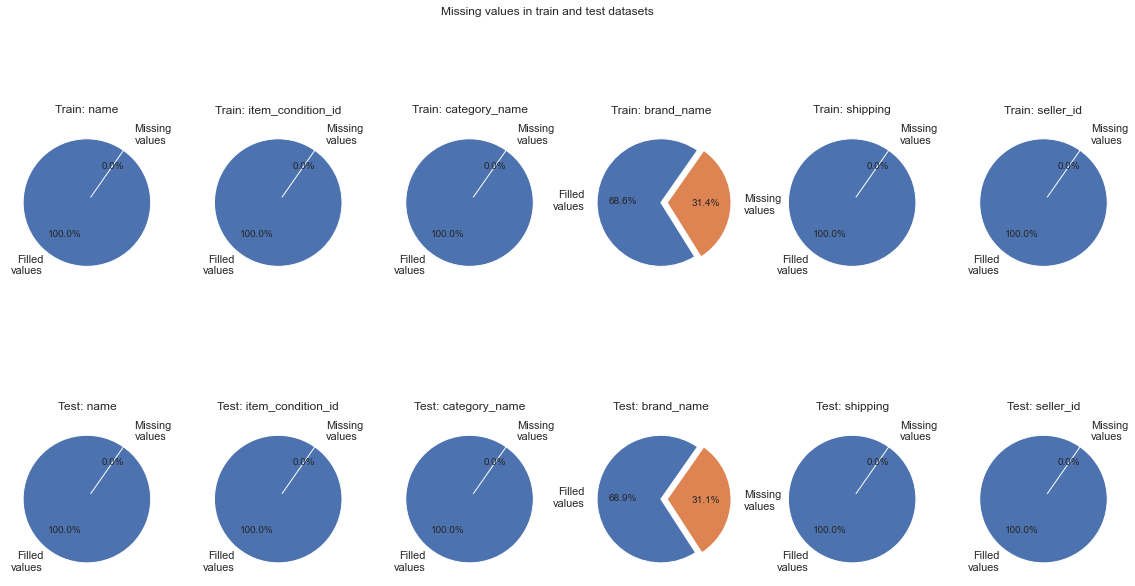

In [3]:
df = pd.concat(
    [
        train.drop(["id", "price"], axis=1).isna().sum(),
        test.drop(["id"], axis=1).isna().sum(),
    ],
    axis=1,
)
df.columns = ["Train", "Test"]

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))

i = 0
fig.set_facecolor("white")
for r in np.arange(1):
    for c in np.arange(6):
        explode = (0, 0.1)
        axs[r, c].pie(
            [len(train) - df.iloc[i]["Train"], df.iloc[i]["Train"]],
            labels=["Filled\nvalues", "Missing\nvalues"],
            explode=explode,
            autopct="%1.1f%%",
            labeldistance=1.2,
            startangle=55,
        )
        axs[r + 1, c].pie(
            [len(test) - df.iloc[i]["Test"], df.iloc[i]["Test"]],
            labels=["Filled\nvalues", "Missing\nvalues"],
            explode=explode,
            autopct="%1.1f%%",
            labeldistance=1.2,
            startangle=55,
        )
        axs[r, c].set_title("Train: " + df.index[i], pad=10)
        axs[r + 1, c].set_title("Test: " + df.index[i], pad=10)
        i += 1
fig.suptitle("Missing values in train and test datasets")
plt.show()


Unique values in both train and test datasets

In [4]:
df = pd.concat(
    [
        train.drop(["id", "price"], axis=1).nunique(),
        test.drop(["id"], axis=1).nunique(),
    ],
    axis=1,
)
df.columns = ["Train", "Test"]
df.T


,name,item_condition_id,category_name,brand_name,shipping,seller_id,item_description
Train,59282,5,23,1083,2,42161,57531
Test,28693,5,23,814,2,23602,27068


Top 5 names in each dataset

In [5]:
train["name"].value_counts()[:5], test["name"].value_counts()[:5]


(Bundle                 114
 Lularoe TC leggings     70
 Dress                   60
 Michael Kors Wallet     53
 Coach wallet            52
 Name: name, dtype: int64,
 Bundle          53
 Dress           36
 Converse        28
 Lularoe Irma    24
 Wallet          23
 Name: name, dtype: int64)

Top 5 brand names in each dataset

In [6]:
train["brand_name"].value_counts()[:5], test["brand_name"].value_counts()[:5]


(PINK                 4617
 LuLaRoe              4447
 Nike                 3515
 Victoria's Secret    3360
 FOREVER 21           1729
 Name: brand_name, dtype: int64,
 PINK                 2163
 LuLaRoe              2064
 Nike                 1670
 Victoria's Secret    1540
 American Eagle        785
 Name: brand_name, dtype: int64)

Top 5 category names

In [7]:
train["category_name"].value_counts()[:5], test["category_name"].value_counts()[:5]


(Women/Athletic apparel/Pants, tights, leggings    9371
 Women/Tops & blouses/T-shirts                     8061
 Women/Tops & blouses/Blouse                       3616
 Women/Tops & blouses/Tank, cami                   3483
 Women/Shoes/Boots                                 3243
 Name: category_name, dtype: int64,
 Women/Athletic apparel/Pants, tights, leggings    4328
 Women/Tops & blouses/T-shirts                     3782
 Women/Tops & blouses/Blouse                       1663
 Women/Tops & blouses/Tank, cami                   1579
 Women/Shoes/Boots                                 1522
 Name: category_name, dtype: int64)

Top 5 item descriptions in each dataset

In [19]:
train["item_description"].value_counts()[:5]

New               217
Never worn        140
Brand new         134
Good condition     96
BNWT               95
Name: item_description, dtype: int64

In [18]:
test["item_description"].value_counts()[:5]

New                115
Never worn          64
Great condition     49
Brand new           48
Good condition      45
Name: item_description, dtype: int64

Item condition distribution

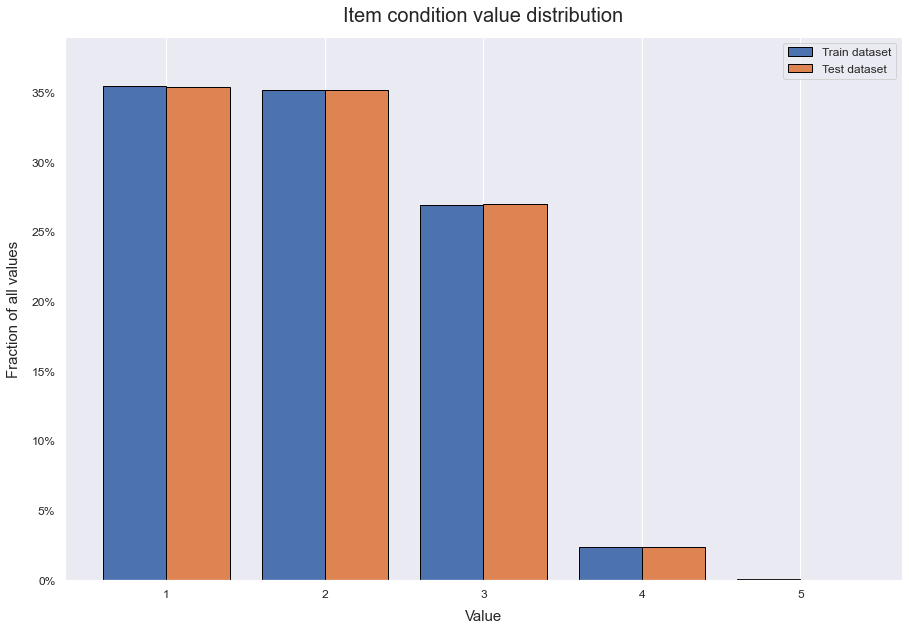

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(1, 6, 1)
y1 = (
    train["item_condition_id"].value_counts().values
    / len(train["item_condition_id"])
    * 100
)
y2 = (
    test["item_condition_id"].value_counts().values
    / len(test["item_condition_id"])
    * 100
)
bars1 = ax.bar(
    x - 0.2,
    y1,
    width=0.4,
    label="Train dataset",
    edgecolor="black",
)
bars2 = ax.bar(
    x + 0.2,
    y2,
    width=0.4,
    label="Test dataset",
    edgecolor="black",
)
ax.set_title(
    "Item condition value distribution", fontsize=20, pad=15
)
ax.set_ylabel("Fraction of all values", fontsize=15, labelpad=10)
ax.set_xlabel("Value", fontsize=15, labelpad=10)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([str(int(x)) + "%" for x in ax.get_yticks()])
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.grid(axis="y")
ax.margins(0.05, 0.1)
ax.legend(fontsize=12)
plt.show()


Shipment distribution

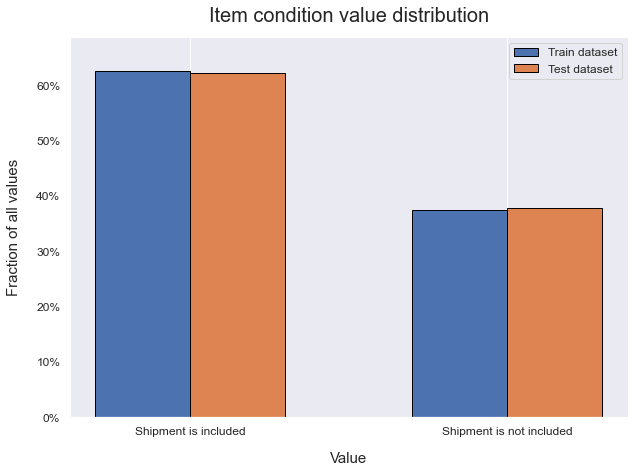

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
x = np.arange(0, 2, 1)
y1 = train["shipping"].value_counts().values / len(train["shipping"]) * 100
y2 = test["shipping"].value_counts().values / len(test["shipping"]) * 100
bars1 = ax.bar(
    x - 0.15,
    y1,
    width=0.3,
    label="Train dataset",
    edgecolor="black",
)
bars2 = ax.bar(
    x + 0.15,
    y2,
    width=0.3,
    label="Test dataset",
    edgecolor="black",
)
ax.set_title(
    "Item condition value distribution", fontsize=20, pad=15
)
ax.set_ylabel("Fraction of all values", fontsize=15, labelpad=15)
ax.set_xlabel("Value", fontsize=15, labelpad=15)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([str(int(x)) + "%" for x in ax.get_yticks()])
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Shipment is included", "Shipment is not included"])
ax.grid(axis="y")
ax.margins(0.05, 0.1)
ax.legend(fontsize=12)
plt.show()


Price distribution

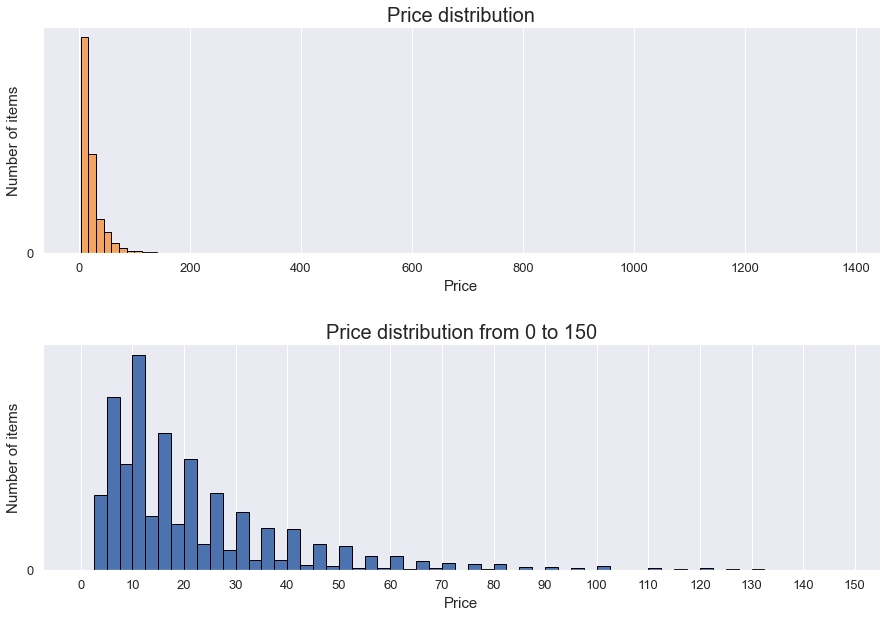

In [17]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))

plt.subplots_adjust(hspace=0.4)

axs[0].hist(train["price"], bins=100, color="sandybrown", edgecolor="black")
axs[0].set_title("Price distribution", fontsize=20, pad=5)
axs[0].set_xlabel("Price", fontsize=15, labelpad=5)
axs[0].set_ylabel("Number of items", fontsize=15, labelpad=5)
axs[0].set_yticks(np.arange(0, 1000000, 100000))
axs[0].tick_params(axis="y", labelsize=13)
axs[0].tick_params(axis="x", labelsize=13)
axs[0].grid(axis="y")
axs[0].margins(0.05, 0.05)

axs[1].hist(
    train[train["price"] < 150]["price"],
    bins=np.arange(0, 150, 2.5),
    edgecolor="black",
)
axs[1].set_title("Price distribution from 0 to 150", fontsize=20, pad=5)
axs[1].set_xlabel("Price", fontsize=15, labelpad=5)
axs[1].set_ylabel("Number of items", fontsize=15, labelpad=5)
axs[1].set_xticks(np.arange(0, 180, 10))
axs[1].set_yticks(np.arange(0, 270000, 20000))
axs[1].tick_params(axis="y", labelsize=13)
axs[1].tick_params(axis="x", labelsize=13)
axs[1].grid(axis="y")
axs[1].margins(0.05, 0.05)


Price dependance on item condition

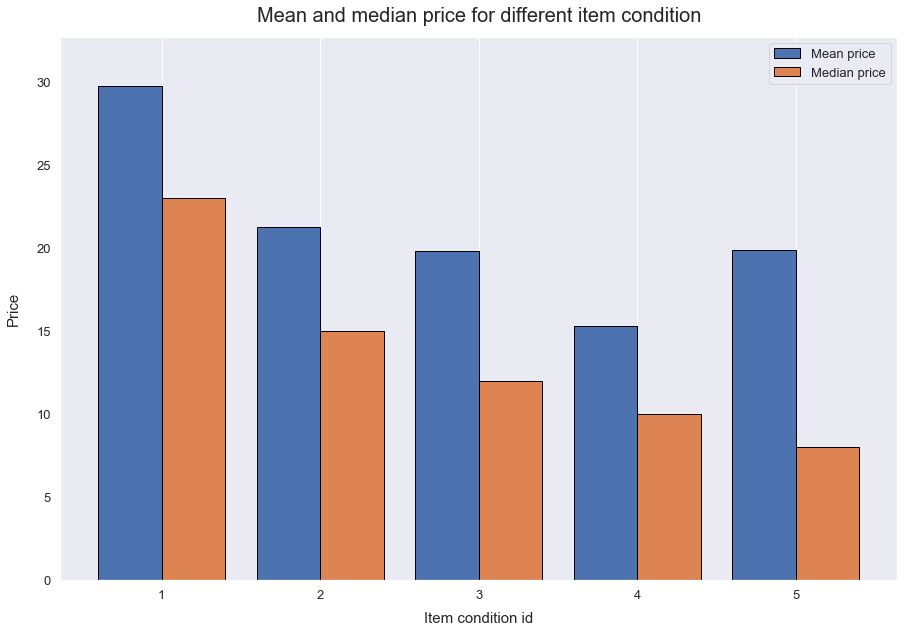

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(1, 6, 1)
y1 = train.groupby("item_condition_id")["price"].mean()
y2 = train.groupby("item_condition_id")["price"].median()

bars1 = ax.bar(
    x - 0.2, y1, width=0.4, label="Mean price", edgecolor="black"
)
bars2 = ax.bar(
    x + 0.2,
    y2,
    width=0.4,
    label="Median price",
    edgecolor="black",
)

ax.set_title("Mean and median price for different item conditions", fontsize=20, pad=15)
ax.set_ylabel("Price", fontsize=15, labelpad=15)
ax.set_xlabel("Item condition id", fontsize=15, labelpad=10)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.grid(axis="y")
ax.margins(0.05, 0.1)
ax.legend(fontsize=13)
plt.show()


Top 10 brand prices

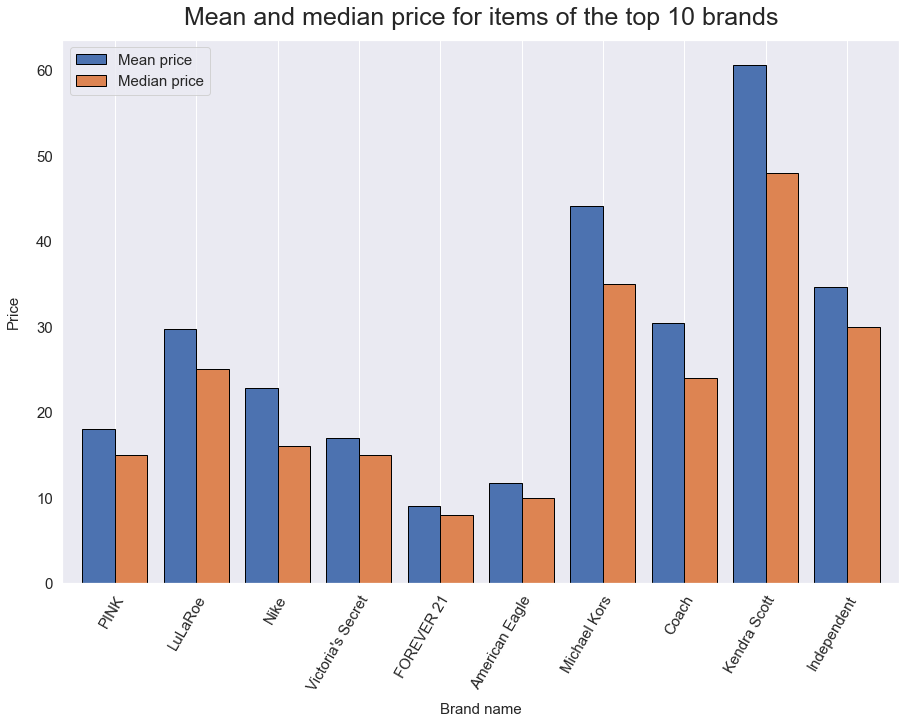

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

brands = train["brand_name"].value_counts().index[:10]
mean_prices = train.groupby("brand_name")["price"].mean()
median_prices = train.groupby("brand_name")["price"].median()
x = np.arange(0, len(brands), 1)

bars1 = ax.bar(
    x - 0.2,
    mean_prices.loc[brands].values,
    width=0.4,
    label="Mean price",
    edgecolor="black",
)
bars2 = ax.bar(
    x + 0.2,
    median_prices.loc[brands].values,
    width=0.4,
    label="Median price",
    edgecolor="black",
)

ax.set_title(
    "Mean and median price for items of the top 10 brands", fontsize=25, pad=15
)
ax.set_ylabel("Price", fontsize=15, labelpad=15)
ax.set_xlabel("Brand name", fontsize=15, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(brands, rotation=60, ha="right", rotation_mode="anchor")
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(axis="y")
ax.margins(0.025, 0.05)
ax.legend(fontsize=15)
plt.show()


Item description length in the both datasets

In [22]:
df = pd.DataFrame()
df["descr_len"] = train["item_description"].str.len()
print(
    f"Train dataset description length info:\n{df['descr_len'].describe(percentiles=[.1, .25, .5, .75, .90, .99])}"
)


Train dataset description length info:
count    61590.000000
mean        80.717340
std         71.633226
min          1.000000
10%         16.000000
25%         32.000000
50%         61.000000
75%        107.000000
90%        169.000000
99%        345.000000
max       1000.000000
Name: descr_len, dtype: float64


In [20]:
df = pd.DataFrame()
df["descr_len"] = test["item_description"].str.len()
print(
    f"\nTest dataset desription length info:\n{df['descr_len'].describe(percentiles=[.1, .25, .5, .75, .90, .99])}"
)



Test dataset desription length info:
count    28719.000000
mean        80.708242
std         71.875853
min          1.000000
10%         16.000000
25%         32.000000
50%         60.000000
75%        107.000000
90%        170.000000
99%        345.000000
max        997.000000
Name: descr_len, dtype: float64


We can see that the training and the test dataset are very similar in item description length

Item description length vs price

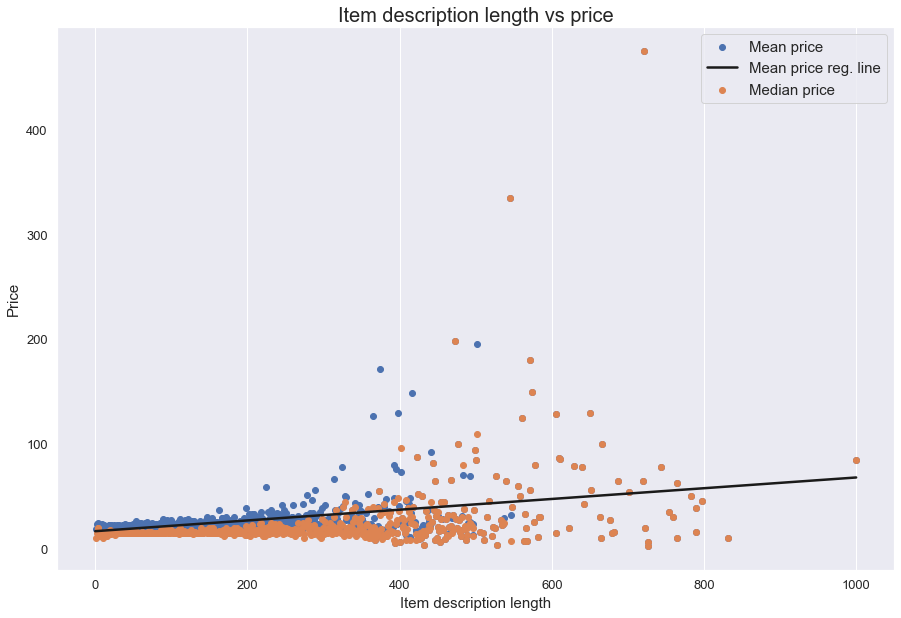

In [35]:
df = pd.DataFrame()
df["descr_len"] = train["item_description"].str.len()
df["price"] = train["price"]

fig, ax = plt.subplots(figsize=(15, 10))

plot1 = ax.scatter(
    df.groupby("descr_len")["price"].mean().index,
    df.groupby("descr_len")["price"].mean().values,
    label="Mean price",
)

b, a = np.polyfit(df.groupby("descr_len")["price"].mean().index, df.groupby("descr_len")["price"].mean().values, deg=1)
xseq = np.linspace(0, 1000, num=1000)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5, label="Mean price reg. line")

plot1 = ax.scatter(
    df.groupby("descr_len")["price"].median().index,
    df.groupby("descr_len")["price"].median().values,
    label="Median price",
)


ax.set_title("Item description length vs price", fontsize=20, pad=5)
ax.set_xlabel("Item description length", fontsize=15, labelpad=5)
ax.set_ylabel("Price", fontsize=15, labelpad=5)
ax.tick_params(axis="y", labelsize=13)
ax.tick_params(axis="x", labelsize=13)
ax.grid(axis="y")
ax.legend(fontsize=15)
ax.margins(0.05, 0.05)
